In [1]:
import os
import wget

data_file = 'NYPD_Complaint_Data_Current__Year_To_Date_.csv'
data_dir = 'data'
cur_dir = os.getcwd()

if os.path.exists(os.path.join(cur_dir, data_dir, data_file)):
    print('Found data file.')
else:
    print('Downloading data file...')
    url = r'https://drive.google.com/drive/folders/1N27QPvtMykZoPKkwoMdy_1S7CZnbhOXw?usp=sharing'
    d_file = wget.download(url)
    print('Downloaded ', d_file)
    os.rename(d_file, os.path.join(cur_dir, data_dir, data_file))


Found data file.


In [2]:
import pandas as pd
data = pd.read_csv(os.path.join(cur_dir, data_dir, data_file))
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,247853895,43.0,BRONX,07/11/2022,09:09:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,1022682.0,242998.0,40.833567,-73.861118,"(40.833567, -73.861118)",POINT (-73.861118 40.833567)
1,250722124,67.0,BROOKLYN,01/01/2021,12:00:00,09/07/2022,12:00:00,COMPLETED,(null),NaN,...,NaN,<18,BLACK,F,997843.0,175671.0,40.648851,-73.951017,"(40.6488507469884, -73.951016510623)",POINT (-73.951016510623 40.6488507469884)
2,239511545,120.0,STATEN ISLAND,12/24/2021,08:00:00,01/03/2022,08:00:00,COMPLETED,(null),NaN,...,NaN,18-24,ASIAN / PACIFIC ISLANDER,M,960911.0,165085.0,40.619768,-74.084070,"(40.619768, -74.08407)",POINT (-74.08407 40.619768)
3,247992275,115.0,QUEENS,06/15/2015,00:01:00,07/13/2022,17:00:00,COMPLETED,(null),NaN,...,NaN,45-64,WHITE,M,1013677.0,212463.0,40.749791,-73.893792,"(40.749791, -73.893792)",POINT (-73.893792 40.749791)
4,239602232,75.0,BROOKLYN,01/01/2018,09:00:00,04/14/2021,23:59:00,COMPLETED,(null),NaN,...,NaN,65+,BLACK,M,1022153.0,184000.0,40.671636,-73.863359,"(40.671636, -73.863359)",POINT (-73.863359 40.671636)


Unique values for LAW_CAT_CD:  ['FELONY' 'MISDEMEANOR' 'VIOLATION']


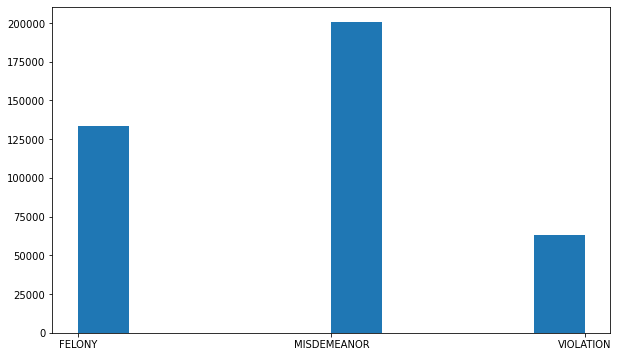

In [11]:
import matplotlib.pyplot as plt


print('Unique values for LAW_CAT_CD: ', data['LAW_CAT_CD'].unique())
plt.figure(figsize = (10,6))
plt.hist(data['LAW_CAT_CD'])
plt.show()

In [15]:
print('Unique values for KY_CD: ',len(data['KY_CD'].unique()), data['KY_CD'].unique() )

Unique values for KY_CD:  65 [105 104 109 112 116 341 578 351 125 126 233 117 344 361 106 113 121 359
 353 340 107 352 110 232 343 348 118 122 347 365 101 355 358 236 114 678
 364 124 235 111 350 115 103 120 346 238 231 342 363 572 675 230 677 349
 102 354 455 119 571 345 356 250 237 366 676]


In [16]:
offense_desc_list = data['OFNS_DESC'].unique()

print('Number of unique values for OFNS_DESC: ', len(offense_desc_list))
print('Unique values for OFNS_DESC: ', offense_desc_list)



Number of unique values for OFNS_DESC:  63
Unique values for OFNS_DESC:  ['ROBBERY' 'RAPE' 'GRAND LARCENY' 'THEFT-FRAUD' 'SEX CRIMES'
 'PETIT LARCENY' 'HARRASSMENT 2' 'CRIMINAL MISCHIEF & RELATED OF'
 'NYS LAWS-UNCLASSIFIED FELONY' 'MISCELLANEOUS PENAL LAW'
 'DANGEROUS DRUGS' 'ASSAULT 3 & RELATED OFFENSES'
 'OFF. AGNST PUB ORD SENSBLTY &' 'FELONY ASSAULT' 'FORGERY'
 'OFFENSES AGAINST PUBLIC ADMINI' 'UNAUTHORIZED USE OF A VEHICLE' 'FRAUDS'
 'BURGLARY' 'CRIMINAL TRESPASS' 'GRAND LARCENY OF MOTOR VEHICLE'
 'POSSESSION OF STOLEN PROPERTY' 'THEFT OF SERVICES'
 'VEHICLE AND TRAFFIC LAWS' 'DANGEROUS WEAPONS' 'GAMBLING'
 'INTOXICATED & IMPAIRED DRIVING' 'ADMINISTRATIVE CODE'
 'MURDER & NON-NEGL. MANSLAUGHTER' 'OFFENSES AGAINST THE PERSON'
 'OTHER OFFENSES RELATED TO THEF' 'OFFENSES INVOLVING FRAUD' '(null)'
 'ARSON' 'OTHER STATE LAWS (NON PENAL LA' 'KIDNAPPING & RELATED OFFENSES'
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED' 'PROSTITUTION & RELATED OFFENSES'
 'HOMICIDE-NEGLIGENT,UNCLASSIFIE' 'ENDAN 

In [18]:
temp = data.iloc[0:100, :].groupby(by = ['LAW_CAT_CD', 'OFNS_DESC'])

In [22]:
temp.count()

CMPLNT_NUM  ADDR_PCT_CD  BORO_NM  \
LAW_CAT_CD  OFNS_DESC                                                          
FELONY      BURGLARY                                 2            2        2   
            CRIMINAL MISCHIEF & RELATED OF           4            4        4   
            DANGEROUS DRUGS                          1            1        1   
            FELONY ASSAULT                           3            3        3   
            FORGERY                                  2            2        2   
            GRAND LARCENY                           15           15       15   
            MISCELLANEOUS PENAL LAW                  3            3        3   
            NYS LAWS-UNCLASSIFIED FELONY             2            2        2   
            RAPE                                     2            2        2   
            ROBBERY                                  1            1        1   
            SEX CRIMES                               2            2        2   
            THEFT-FRAUD                             11           11       11   
MISDEMEANOR ASSAULT 3 & RELATED OFFENSES             2            2        2   
            CRIMINAL MISCHIEF & RELATED OF           7            7        7   
            CRIMINAL TRESPASS                        1            1        1   
            FRAUDS                                   1            1        1   
            OFF. AGNST PUB ORD SENSBLTY &            3            3        3   
            OFFENSES AGAINST PUBLIC ADMINI           1            1        1   
            PETIT LARCENY                           18           18       18   
            SEX CRIMES                               7            7        7   
            UNAUTHORIZED USE OF A VEHICLE            1            1        1   
VIOLATION   HARRASSMENT 2                           11           11       11   

                                            CMPLNT_FR_DT  CMPLNT_FR_TM  \
LAW_CAT_CD  OFNS_DESC                                                    
FELONY      BURGLARY                                   2             2   
            CRIMINAL MISCHIEF & RELATED OF             4             4   
            DANGEROUS DRUGS                            1             1   
            FELONY ASSAULT                             3             3   
            FORGERY                                    2             2   
            GRAND LARCENY                             15            15   
            MISCELLANEOUS PENAL LAW                    3             3   
            NYS LAWS-UNCLASSIFIED FELONY               2             2   
            RAPE                                       2             2   
            ROBBERY                                    1             1   
            SEX CRIMES                                 2             2   
            THEFT-FRAUD                               11            11   
MISDEMEANOR ASSAULT 3 & RELATED OFFENSES               2             2   
            CRIMINAL MISCHIEF & RELATED OF             7             7   
            CRIMINAL TRESPASS                          1             1   
            FRAUDS                                     1             1   
            OFF. AGNST PUB ORD SENSBLTY &              3             3   
            OFFENSES AGAINST PUBLIC ADMINI             1             1   
            PETIT LARCENY                             18            18   
            SEX CRIMES                                 7             7   
            UNAUTHORIZED USE OF A VEHICLE              1             1   
VIOLATION   HARRASSMENT 2                             11            11   

                                            CMPLNT_TO_DT  CMPLNT_TO_TM  \
LAW_CAT_CD  OFNS_DESC                                                    
FELONY      BURGLARY                                   2             2   
            CRIMINAL MISCHIEF & RELATED OF             2             4   
            DANGEROUS DRUGS                       

In [29]:
print(len(data.index))
print(data.loc[:, ['Latitude', 'Longitude']].describe())
filtered_data = data.loc[data['Latitude'].notnull(), :]
filtered_data = filtered_data.loc[filtered_data['Longitude'].notnull(), :]
print(filtered_data.loc[:, ['Latitude', 'Longitude']].isnull().any())
print(len(filtered_data.index))

396978
            Latitude      Longitude
count  396969.000000  396969.000000
mean       40.736895     -73.924595
std         0.081697       0.076802
min        40.499393     -74.254161
25%        40.676281     -73.974570
50%        40.734681     -73.927811
75%        40.810352     -73.880803
max        40.912714     -73.700286
Latitude     False
Longitude    False
dtype: bool
396969
